In [2]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'A': 1.,
    'B': pd.Series(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09'], index=list(range(9)), dtype='datetime64[ns]'),
    'C': pd.Series(randn(9), index=list(range(9)),dtype='float32'),
    'D': np.array([3] * 9, dtype='int32'),
    'E': pd.Categorical(["washington", "adams", "washington", "madison", "lincoln","jefferson", "hamilton", "roosevelt", "kennedy"]),
    'F': ["foo", "bar", "buzz", "bippity","boppity", "foo", "foo", "bar", "zoo"] })
df_types['G'] = df_types['F'] == 'foo'
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=True)
qgrid_widget
# qgrid.show_grid(df_types)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [7]:
df_types

,A,B,C,D,E,F,G
0,1.0,2013-01-01,0.021915,3,washington,foo,True
1,1.0,2013-01-02,-1.911862,3,adams,bar,False
2,1.0,2013-01-03,0.370484,3,washington,buzz,False
3,1.0,2013-01-04,1.384196,3,madison,bippity,False
4,1.0,2013-01-05,-1.048261,3,lincoln,boppity,False
5,1.0,2013-01-06,-0.020804,3,jefferson,foo,True
6,1.0,2013-01-07,-0.607087,3,hamilton,foo,True
7,1.0,2013-01-08,2.052093,3,roosevelt,bar,False
8,1.0,2013-01-09,0.574161,3,kennedy,zoo,False


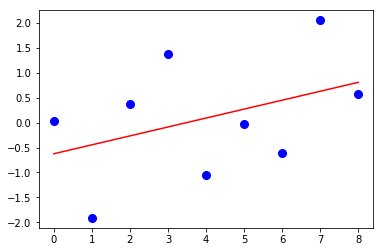

In [3]:
# %matplotlib nbagg
import matplotlib.pyplot as plt

n = 50
x = qgrid_widget._df.index
y = qgrid_widget._df['C']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
line, = ax.plot(x, fit[0] * x + fit[1], color='red')
scatter, = ax.plot(x,y,ms=8,color='b',marker='o',ls='')

def func(change):
    x = change['new'].index
    y = change['new']['C']
    fit = np.polyfit(x, y, deg=1)
    line.set_data(x, fit[0] * x + fit[1])
    fig.canvas.draw()
    scatter.set_data(x, y)
    fig.canvas.draw()

qgrid_widget.observe(func, names=['_df'])

In [4]:
qgrid_widget # render the qgrid widget again so we don't have to scroll to see the changes in the scatter plot

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [5]:
df_types['A']

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
Name: A, dtype: float64